# A1_노선호_통계3일차

In [32]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline
from scipy.stats import shapiro

## [실습]카이제곱 검정 

In [33]:
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,3,4,9,5,4],'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})

# 데이터 프레임에 데이터 입력 
chi,pval,dof,expected = stats.chi2_contingency(df.T) 
#chi-squre test실행

#결과 출력
print("chi-squre test") 
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))

#(h0) 귀무가설-> 각 제품에 대한 이미지에 대해 차이가 없다.
#(h1) 대립가설-> 각 제품에 대한 이미지에 대해 차이가 있다.
#p-value값이 0이므로 p-value<0.05는 성립한다고 볼 수 있다.
#이에 따라 각 제품에 대한 이미지에 대해 차이가 있다고 볼 수 있다.
#결론: 대립가설을 채택했다.

chi-squre test
chisq: 98.274
p: 0.000
degree pf freedom: 30


# [실습] One way ANOVA

In [34]:
import csv

f = open('ANOVA.csv', 'r')
reader = csv.reader(f)
dic = {}
i = 0

for row in reader:
    if i == 0:
        i += 1
        continue
    if row[2] not in dic:
        dic[row[2]] = []
        dic[row[2]].append(row[0])
    else:
        dic[row[2]].append(row[0])

df = pd.DataFrame(dic)

f_result = stats.f_oneway(df['a'],df['b'],df['c'],df['d'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

F 통계량: 4.172
p-value: 0.019



F 통계량: 4.172 

p-value: 0.019

가설설립

귀무가설 : 강종별 2차정련 시간에 차이가 있다고 할 수 없다.

대립가설 : 강종별 2차정련 시간에 차이가 있다고 할 수 있다.

가설검정

검정통계량 : 4.172

p-value : 0.019

유의수준 : 0.05

검정결과 판단

p-value < 유의수준 이므로 귀무가설을 기각한다.

결론

강종별 2차정련 시간에 차이가 있다고 할 수 있다.

# [실습] 상관분석

In [35]:

df1 = [37.6, 38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5] #강도 값 입력
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21] #온도 값 입력

corr, pval = stats.pearsonr(df1, df2) #Correlation Analysis 실행 및 변수 저장
 
print("Correlation Analysis") #결과 출력
print('corr:{0:0.3f}'.format(corr))
print('p-value : {0:0.3f}'.format(pval))

# 대립가설: 초코칩의 강도와 재료 반죽온도간에 매우 강한 상관성이 있다.
# p<0.05이므로, 초코칩의 강도와 재료 반죽온도간에는 매우 강한 상관성이 있다고 볼 수 있다.
# 즉, 대립가설을 채택한다.



Correlation Analysis
corr:-0.723
p-value : 0.000



가설설립

귀무가설 : 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 없다.
    
대립가설 : 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 있다.
    
가설검정

p-value : 0.000
    
유의수준 : 0.05
    
검정결과 판단

p-value < 유의수준 이므로 귀무가설을 기각한다.

결론

초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 있다.

# [실습] 단순선형회귀1

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.95e-05
Time:                        10:42:50   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0013      4.184      3.108      

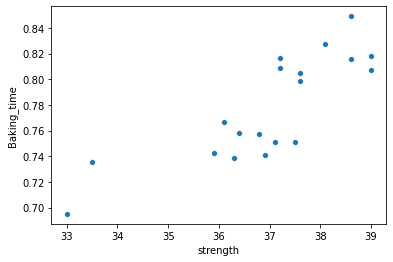

In [39]:

df = pd.DataFrame({'strength' : [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
'Baking_time' : [0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,0.751118,0.740629,0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]})

df.head()

sns.scatterplot(x='strength', y='Baking_time', data=df)

Baking = sm.add_constant(df['Baking_time'])
model = sm.OLS(df['strength'], Baking)
result = model.fit()

print(result.summary())

# 회귀식은 Baking_time = 13.00013 + 30.8722 * strength 이다.
# Baking_time의 P값은 p<0.05 이므로 유의미하다.
# R-square 값은 0.646으로 설명력이 높은 편이다.
# 따라서, 초코칩의 강도와 굽는 시간과의 인과관계가 있다고 볼 수 있다.

# [실습] 단순선형회귀2

In [40]:
df_raw = pd.read_csv("/home/piai/Downloads/correaltion.csv", engine = "python")
df_raw.head(3)

from sklearn.linear_model import LinearRegression #선형회귀모델

import statsmodels.formula.api as smf #선형모델 formula(y ~ x1 + x2 + ...)

model = smf.ols(formula = "strength~Oven_TMP", data = df_raw) #Linear Regression 실행

result = model.fit() #적합

print(result.summary())

# 결론 : 회귀식은 strength = 30.419 + 0.0056 * Oven_TMP이다. 설명력은 R-Sq = 0.1%이다.

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1136
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.737
Time:                        10:49:47   Log-Likelihood:                -223.88
No. Observations:                  86   AIC:                             451.8
Df Residuals:                      84   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4190      5.271      5.771      0.0